In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('Fish.csv', header=0)
df.head(10)

,Species,Weight,LengthVer,LengthDiag,LengthCross,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


### Meanings of the Columns:

- **Species**: Species name of fish
- **Weight**: Weight of fish in grams
- **LengthVer**: Vertical length in cm
- **LengthDiag**: Diagonal length in cm
- **LengthCross**: Cross length in cm
- **Height**: Height in cm
- **Width**: Diagonal width in cm

In [3]:
df.describe()

,Weight,LengthVer,LengthDiag,LengthCross,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### As we can see there is a fish with 0 weight :)  Let's drop it

In [4]:
zero_weight_fish_row = df[df['Weight'] == 0]
zero_weight_fish_row

,Species,Weight,LengthVer,LengthDiag,LengthCross,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [5]:
df.drop([40], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

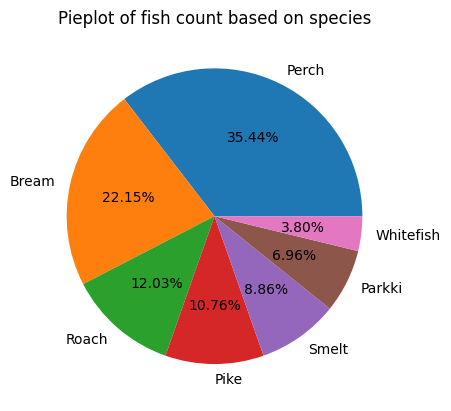

In [6]:
spieces_count = df['Species'].value_counts()
plt.pie(spieces_count, labels=spieces_count.index, autopct = lambda p: f'{p:.2f}%')
plt.title("Pieplot of fish count based on species")
plt.show()

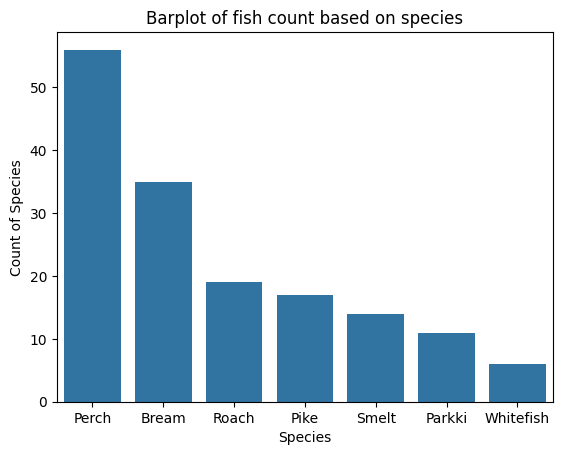

In [7]:
sns.barplot(x = spieces_count.index, y = spieces_count.tolist())
plt.xlabel('Species')
plt.ylabel('Count of Species')
plt.title('Barplot of fish count based on species')
plt.show()

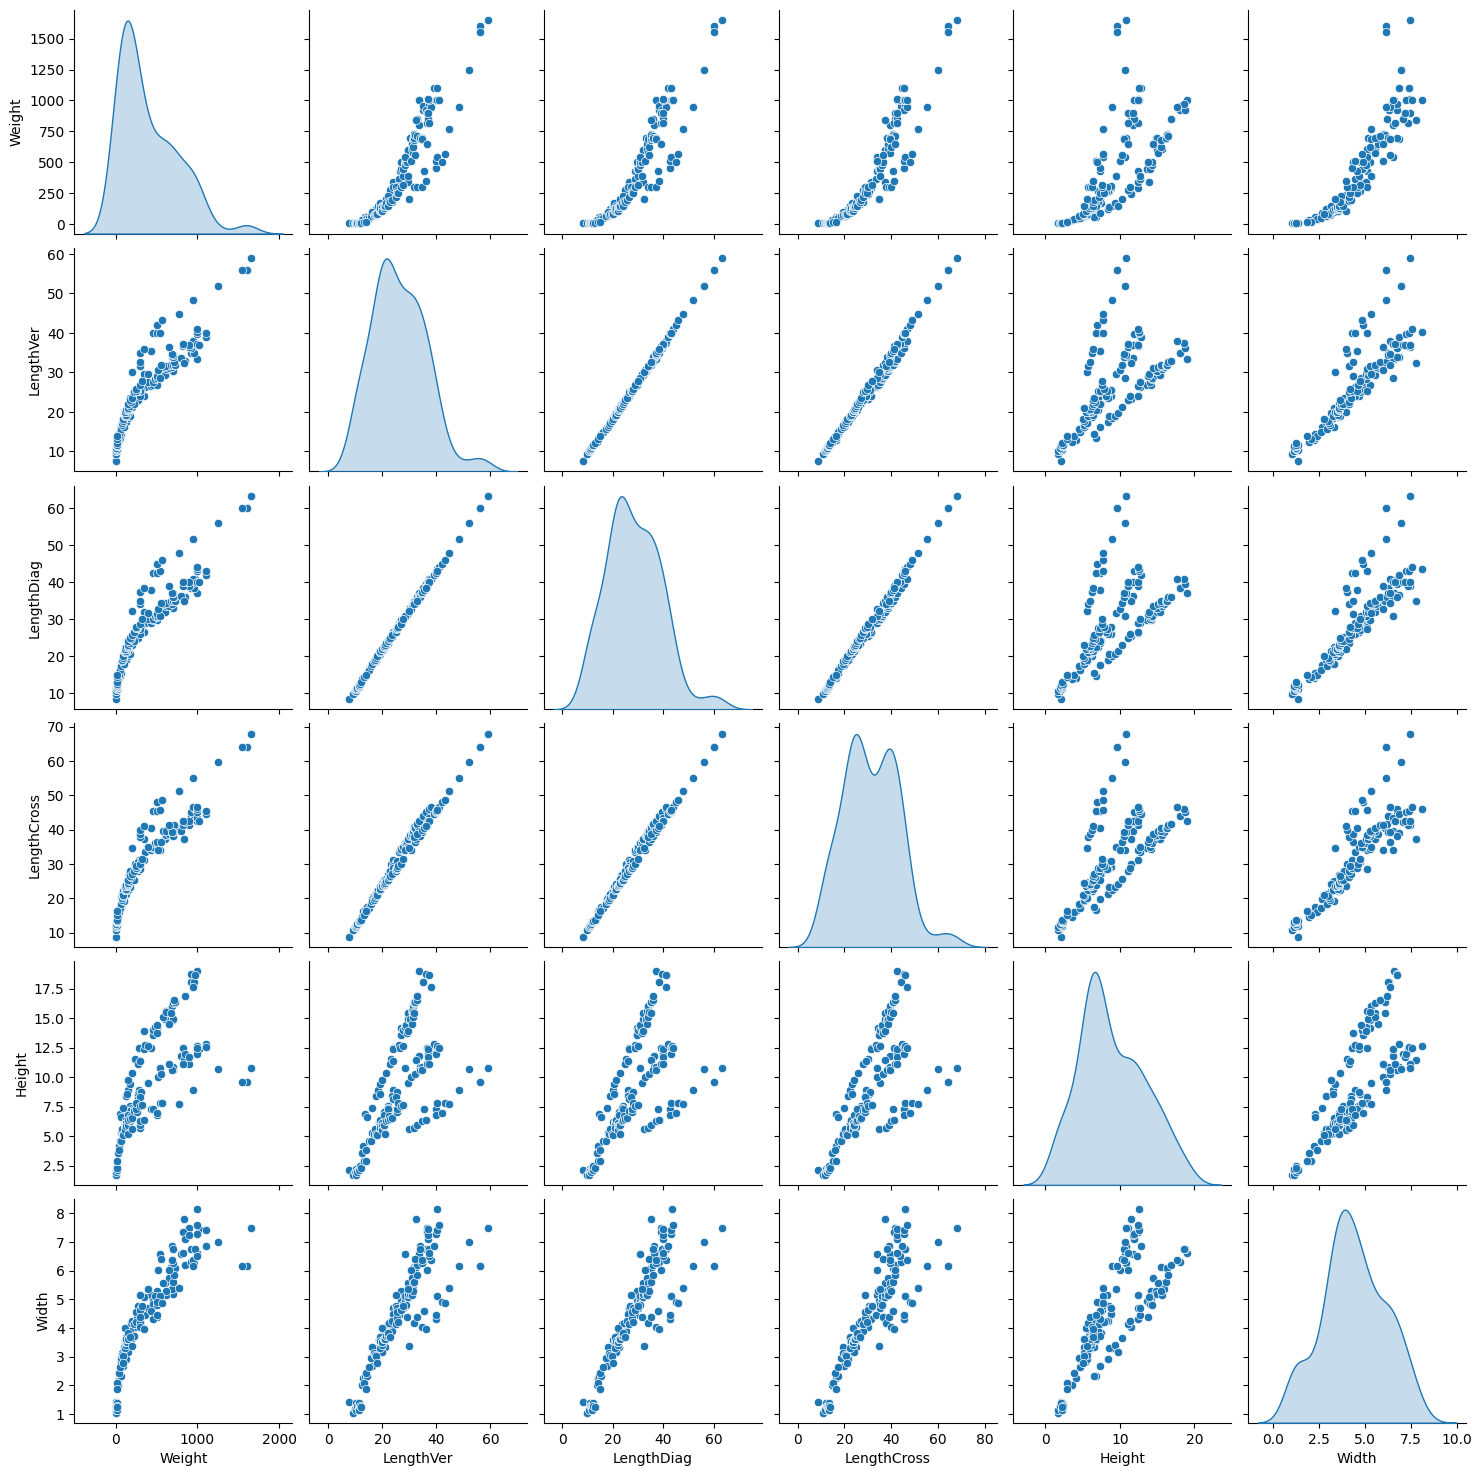

In [8]:
sns.pairplot(df, diag_kind = 'kde')
plt.show()

### High correlation between Lengths

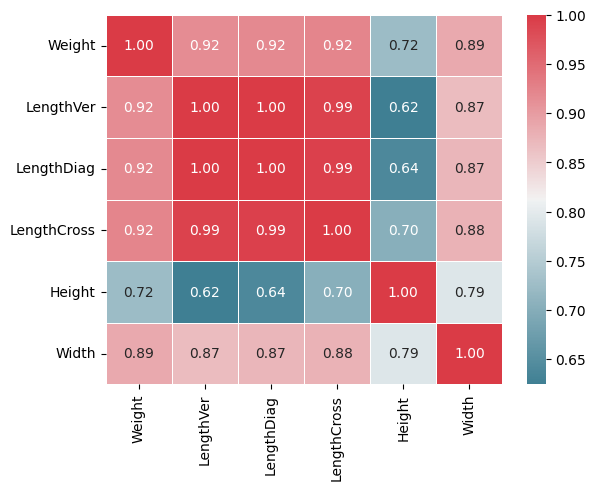

In [9]:
features_for_corr = ['Weight', 'LengthVer', 'LengthDiag', 'LengthCross', 'Height', 'Width']

corr = df[features_for_corr].corr()

sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", linewidths=0.5)

plt.show()

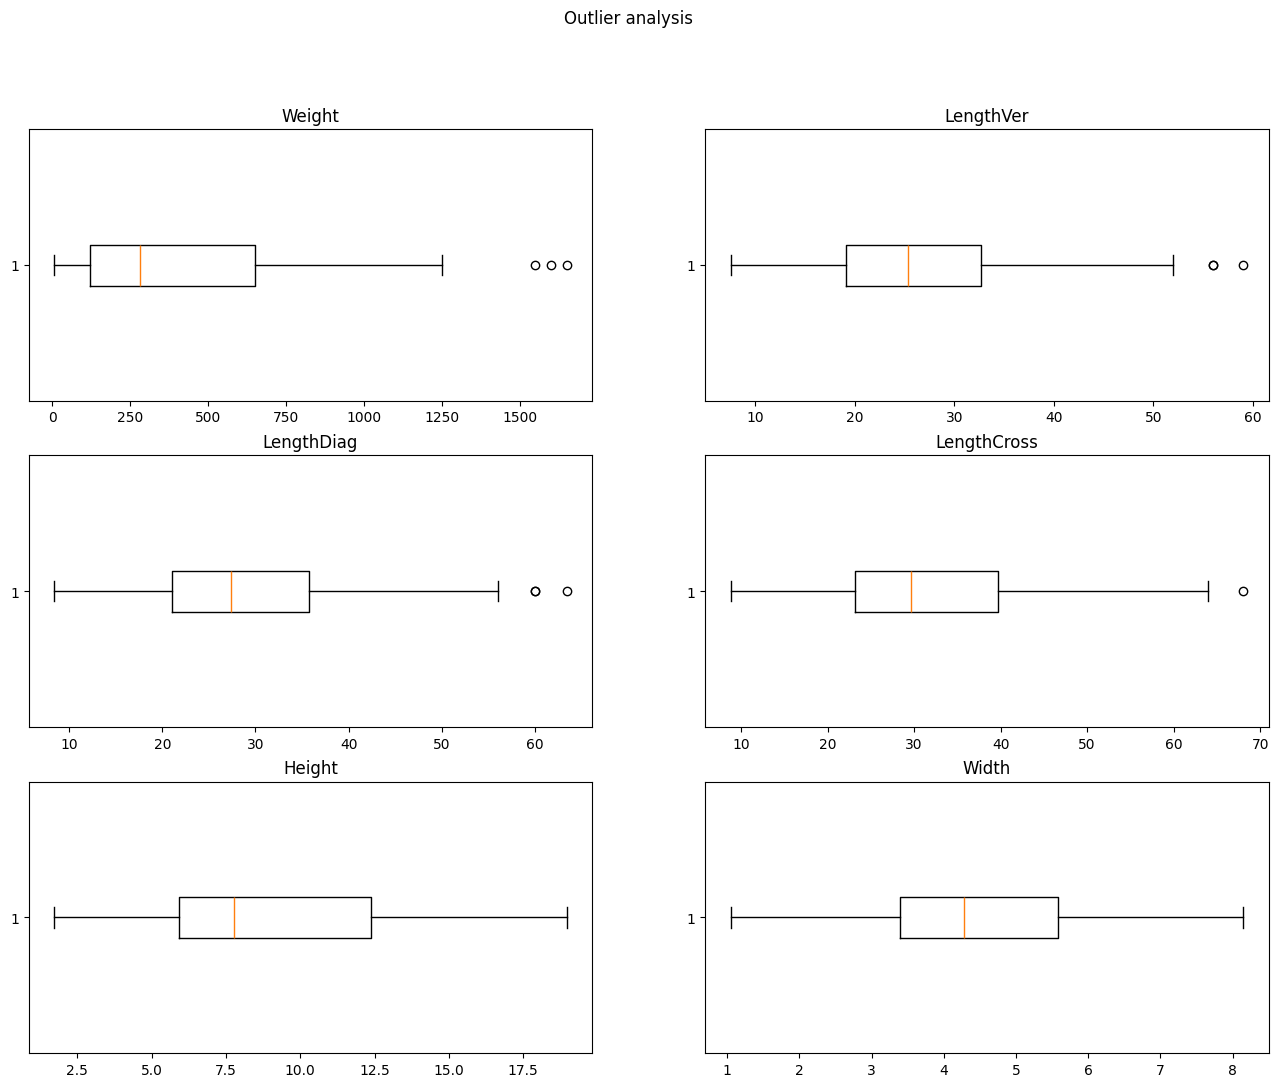

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

axs[0, 0].boxplot(df['Weight'], vert = False)
axs[0, 0].set_title('Weight')

axs[0, 1].boxplot(df['LengthVer'], vert = False)
axs[0, 1].set_title('LengthVer')

axs[1, 0].boxplot(df['LengthDiag'], vert = False)
axs[1, 0].set_title('LengthDiag')

axs[1, 1].boxplot(df['LengthCross'], vert = False)
axs[1, 1].set_title('LengthCross')

axs[2, 0].boxplot(df['Height'], vert = False)
axs[2, 0].set_title('Height')

axs[2, 1].boxplot(df['Width'], vert = False)
axs[2, 1].set_title('Width')

fig.suptitle('Outlier analysis')

plt.show()

In [11]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    
    if len(outliers):
        return outliers

In [12]:
outliers = detect_outliers(df, 'Weight')
outliers

,Species,Weight,LengthVer,LengthDiag,LengthCross,Height,Width
141,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
142,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [13]:
outliers = detect_outliers(df, 'LengthVer')
outliers

,Species,Weight,LengthVer,LengthDiag,LengthCross,Height,Width
141,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
142,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [14]:
outliers = detect_outliers(df, 'LengthDiag')
outliers

,Species,Weight,LengthVer,LengthDiag,LengthCross,Height,Width
141,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
142,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [15]:
outliers = detect_outliers(df, 'LengthCross')
outliers

,Species,Weight,LengthVer,LengthDiag,LengthCross,Height,Width
143,Pike,1650.0,59.0,63.4,68.0,10.812,7.48


In [16]:
# Droping outliers
df.drop([142,143,144], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

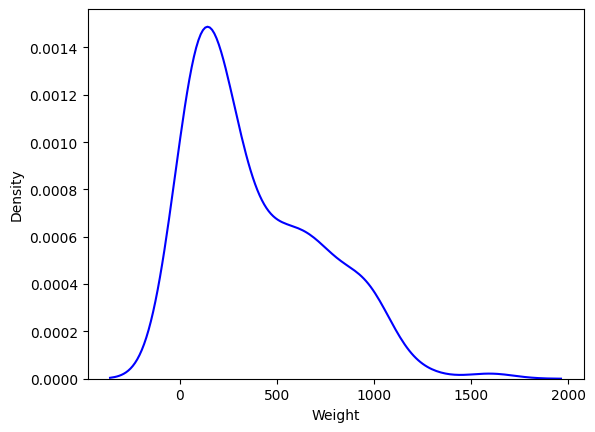

In [17]:
# Kde of Weight after dropping outliers
sns.kdeplot(df['Weight'], color='b')
plt.show()

In [18]:
df

,Species,Weight,LengthVer,LengthDiag,LengthCross,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
150,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
151,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
152,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
153,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# OLS

In [19]:
features = ['LengthVer', 'LengthDiag', 'LengthCross', 'Height', 'Width']

X = df[features]
y = df['Weight']

In [20]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     245.0
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           5.58e-70
Time:                        16:13:31   Log-Likelihood:                -947.30
No. Observations:                 155   AIC:                             1907.
Df Residuals:                     149   BIC:                             1925.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -464.9623     28.293    -16.434      0.000    -520.870    -409.054
LengthVer      82.1669     36.777      2.234      0.027       9.494     154.839
LengthDiag    -22.9525     38.072     -0.603      0.548     -98.183      52.278
LengthCross   -35.6111     15.810     -2.252      0.026     -66.852      -4.370
Height         34.0426      8.014      4.248      0.000      18.206      49.879
Width          35.9019     18.645      1.926      0.056      -0.942      72.746
==============================================================================
Omnibus:                       48.737   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.528
Skew:                           1.275   Prob(JB):                     1.23e-28
Kurtosis:                       6.660   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### As we can see p_value of 'LengthDiag' is greater than 0.05 => This feature is not statisticaly significant. Moreover, there is high correlation between 'LengthVer' and 'LengthCross' let's drop 'LengthCross' as well.

In [21]:
X.drop(['LengthDiag', 'LengthCross'], axis=1, inplace=True)

In [22]:
X

,const,LengthVer,Height,Width
0,1.0,23.2,11.5200,4.0200
1,1.0,24.0,12.4800,4.3056
2,1.0,23.9,12.3778,4.6961
3,1.0,26.3,12.7300,4.4555
4,1.0,26.5,12.4440,5.1340
...,...,...,...,...
150,1.0,11.5,2.0904,1.3936
151,1.0,11.7,2.4300,1.2690
152,1.0,12.1,2.2770,1.2558
153,1.0,13.2,2.8728,2.0672


In [23]:
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     390.9
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           6.08e-71
Time:                        16:13:35   Log-Likelihood:                -951.21
No. Observations:                 155   AIC:                             1910.
Df Residuals:                     151   BIC:                             1923.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -488.7908     27.348    -17.873      0.000    -542.825    -434.756
LengthVer     18.0979      2.041      8.868      0.000      14.065      22.130
Height        15.0722      3.543      4.254      0.000       8.071      22.073
Width         61.2077     14.399      4.251      0.000      32.758      89.657
==============================================================================
Omnibus:                       44.009   Durbin-Watson:                   0.507
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.982
Skew:                           1.257   Prob(JB):                     1.06e-20
Kurtosis:                       5.815   Cond. No.                         89.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
X['Bream'] = 0 
X['Perch'] = 0
X['Whitefish'] = 0
X['Parkki'] = 0
X['Smelt'] = 0
X['Pike'] = 0
X['Roach'] = 0
for index, row in df.iterrows():
    specy = row['Species']
    X.at[index, specy] = 1

In [38]:
X

,const,LengthVer,Height,Width,Bream,Perch,Whitefish,Parkki,Smelt,Pike,Roach
0,1.0,23.2,11.5200,4.0200,1,0,0,0,0,0,0
1,1.0,24.0,12.4800,4.3056,1,0,0,0,0,0,0
2,1.0,23.9,12.3778,4.6961,1,0,0,0,0,0,0
3,1.0,26.3,12.7300,4.4555,1,0,0,0,0,0,0
4,1.0,26.5,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
150,1.0,11.5,2.0904,1.3936,0,0,0,0,1,0,0
151,1.0,11.7,2.4300,1.2690,0,0,0,0,1,0,0
152,1.0,12.1,2.2770,1.2558,0,0,0,0,1,0,0
153,1.0,13.2,2.8728,2.0672,0,0,0,0,1,0,0


In [40]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     219.9
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           7.43e-80
Time:                        16:17:39   Log-Likelihood:                -911.44
No. Observations:                 155   AIC:                             1843.
Df Residuals:                     145   BIC:                             1873.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -589.5353     30.116    -19.576      0.000    -649.058    -530.013
LengthVer     28.1602      4.148      6.788      0.000      19.961      36.359
Height        30.0820     12.676      2.373      0.019       5.028      55.136
Width         15.9182     22.963      0.693      0.489     -29.468      61.305
Bream       -189.1918     64.849     -2.917      0.004    -317.363     -61.021
Perch        -64.9936     21.485     -3.025      0.003    -107.457     -22.530
Whitefish    -79.2381     35.542     -2.229      0.027    -149.486      -8.990
Parkki      -103.8872     40.606     -2.558      0.012    -184.144     -23.630
Smelt        190.5738     31.425      6.064      0.000     128.464     252.684
Pike        -248.3565     70.208     -3.537      0.001    -387.119    -109.594
Roach        -94.4419     21.397     -4.414      0.000    -136.732     -52.152
==============================================================================
Omnibus:                       72.474   Durbin-Watson:                   0.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              339.956
Skew:                           1.677   Prob(JB):                     1.51e-74
Kurtosis:                       9.434   Cond. No.                     1.29e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.17e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
X.drop(['const'], axis=1, inplace=True)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 10), (31, 10), (124,), (31,))

In [55]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = linear_reg.predict(X_test)
r2_score(y_test, y_pred)

0.9602846084456537

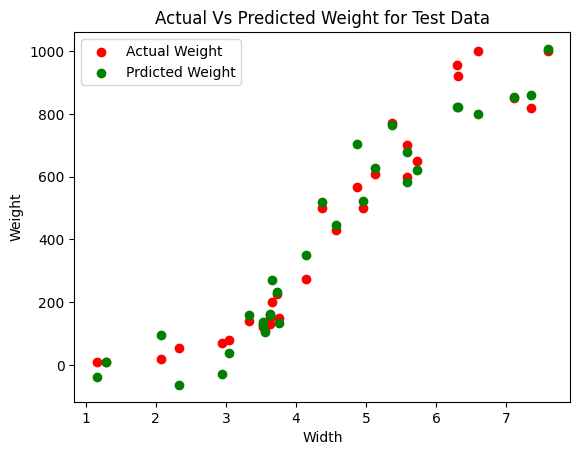

In [48]:
plt.scatter(X_test['Width'], y_test, color='red', label = 'Actual Weight')
plt.scatter(X_test['Width'], y_pred, color='green', label = 'Prdicted Weight')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Actual Vs Predicted Weight for Test Data')
plt.legend()
plt.show()